As the Trump Presidency continues to unfold, each day and each new issue continues to either shock or relieve. Whether a series of tweets, accusations, reactions, or proposed changes, the mannerisms and postures of the current President are unlike anything in previous history. If we examine the past 13 Presidents, Trump had the highest disapproval rating of any President at the start of their presidency by at least 20 points. He was also second to last in approval ratings at the start of any presidency, only surpassed by W. Bush, who entered office at the tail end of an unprecedented election controversy. The man with no previous experience seems incapable of garnering any support above 50 percent, and yet, with all of this unpopularity, Trump has also maintained a rather consistent approval rating, right around 40 points. Regardless of the controversy or questionable decisions, the man seems utterly incapable of losing this base of support.  So, while we examine this reflection of public opinion, at what seems to be the most historically divisive, can we understand the relationship between it and the rhetoric and posture of this administration. Simplified, how does Trump’s position and attitude these ratings?

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
reg = LinearRegression()
forrest = RandomForestRegressor()
pd.options.display.max_columns = None 


In [169]:
#reading in data and modifying our outcome variables

df = pd.read_excel('speech_data.xlsx', header= 0, parse_dates= ['Date'])
df.index = df['Date']
df = df.drop(columns='Date')
app_day = df.adjusted_approve.resample('d').mean().dropna()
app_week = df.adjusted_approve.resample('w').mean().dropna()
dis_day = df.adjusted_disapprove.resample('d').mean().dropna()
dis_week = df.adjusted_disapprove.resample('w').mean().dropna()
dif_app_day = df.adjusted_approve.groupby(df.index).mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)
dif_app_week = df.adjusted_approve.resample('w').mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)[1:]
dif_dis_day = df.adjusted_disapprove.groupby(df.index).mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)
dif_dis_week = df.adjusted_disapprove.resample('w').mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)[1:]
rating_day = [app_day.bfill(), dis_day.bfill(), dif_app_day, dif_dis_day]
rating_week = [app_week, dis_week, dif_app_week, dif_dis_week]
dif_app_day.name = 'App rating change'
dif_dis_day.name = 'Dis rating change'


count    61.000000
mean      0.181637
std       1.307823
min      -3.222127
25%      -0.654084
50%       0.070751
75%       1.044413
max       3.257202
Name: adjusted_disapprove, dtype: float64

In [95]:
df.head()
#print(df.describe())
#print(df.corr())

Date
2017-01-20    0.000000
2017-01-21    0.000000
2017-01-22    0.000000
2017-01-23    1.565457
2017-01-24    0.228415
2017-01-25   -1.867383
2017-01-26    1.320631
2017-01-27   -1.630679
2017-01-28    0.976600
2017-01-29    2.111221
2017-01-30   -0.948263
2017-01-31   -0.291143
2017-02-01    0.267978
2017-02-02   -1.330391
2017-02-03    0.613998
2017-02-05    0.489558
2017-02-06   -0.116902
2017-02-07   -0.422770
2017-02-08    0.594211
2017-02-09    0.515153
2017-02-10   -1.496936
2017-02-11   -0.122314
2017-02-13    0.772710
2017-02-14   -0.732824
2017-02-15    1.365078
2017-02-16   -0.814286
2017-02-17   -1.883075
2017-02-18   -0.618124
2017-02-20    2.027248
2017-02-21   -1.936929
                ...   
2018-01-27    1.133333
2018-01-28   -0.174740
2018-01-29    1.144094
2018-01-30    1.504224
2018-01-31    0.092126
2018-02-01    1.401879
2018-02-02   -2.014298
2018-02-04    1.118386
2018-02-05    0.485543
2018-02-06   -0.478601
2018-02-08    1.570740
2018-02-09   -1.054344
2018-0

After pulling in and cleaning all available speeches given by Trump between his inauguration and the date the speeches were scraped, the 1,020 speeches were grouped by day, week, and month. Based on these groupings, we then compute the proportion of words related to a particular sentiment or topic. For example, January 20, 2017, Trump gave four speeches, and out of all the words in those four speeches, 12.4% were words related to a positive sentiment. 



#### By Day

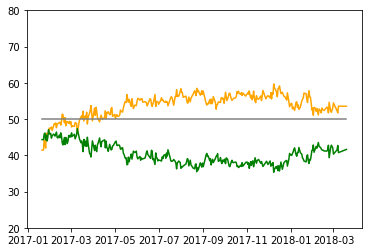

approval gain in 2018: 1.6221007954545499
disapproval gain in 2018: -0.7618039772727201


In [4]:
#recreate the approval ratings visualization from FiveThirtyEight
#examine daily trends in approval ratings
plt.plot(df.iloc[:,-1], c = 'orange')
plt.plot(df.iloc[:, -2], c = 'green')
plt.plot((df.index[0], df.index[-1]), (50, 50),  c ='gray')
plt.ylim(20, 80)
plt.show()

dis17 = df.loc['2018-01-01', "adjusted_disapprove"]
app17 = df.loc['2018-01-01', "adjusted_approve"]
disq1 = np.max(df.iloc[-1, -1])
appq1 = np.max(df.iloc[-1, -2])
print("approval gain in 2018: " + str(appq1 - app17))
print("disapproval gain in 2018: " + str(disq1 - dis17))


We can first recreate FiveThirtyEight's visualization of approval and disapproval rating. We see a general trend of loosing approval and gaining disapproval over the first eight or nine months and stabalizing over the next three for a relatively poor first year. At the start of his second, we notice a quick increase in approval and decrease in disapproval ratings. This is most likely due to an expanding economy and a focus on tougher immigration.  We see that this difference between the end of 2017 and this first quarter, Trump experiences an increase in 1.6 points in approval rating* and a 0.76 decrease in disapproval ratings. 

*(FiveThirtyEight reports a 2 point difference in this period of time, but since we collapsed their data in a different manner than they would, we observe a 1.6 point increase.)*

In [5]:
#modify our predictor variables to represent daily proportions
corpora = df.columns[4:22]
by_day = pd.DataFrame()
grouped = df.resample('d').sum()
for i in corpora:
    by_day[i+'_percent'] = grouped[i]/grouped['Speech Length']
by_day = by_day.dropna()
by_day.head()

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent
Date,,,,,,,,,,,,,,,,,,
2017-01-20,0.123977,0.030975,0.131013,0.040918,0.015755,0.024092,0.019120,0.012008,0.080076,0.080765,0.008260,0.006042,0.008107,0.008489,0.019350,0.018738,0.022180,0.024933
2017-01-21,0.112159,0.028731,0.065275,0.021917,0.022680,0.022441,0.044930,0.021965,0.068325,0.070135,0.001239,0.005670,0.000572,0.004765,0.010530,0.006528,0.000858,0.007766
2017-01-22,0.137187,0.020876,0.116999,0.015600,0.010094,0.010553,0.026382,0.004818,0.065611,0.090158,0.006423,0.003212,0.002982,0.002524,0.017435,0.029594,0.010323,0.010782
2017-01-23,0.084979,0.019929,0.064537,0.023142,0.041814,0.018579,0.027612,0.011641,0.028916,0.043584,0.003213,0.009592,0.000000,0.003446,0.007124,0.022351,0.005075,0.049870
2017-01-24,0.059084,0.016787,0.088853,0.013892,0.008104,0.007856,0.011246,0.005086,0.028488,0.037294,0.001158,0.011288,0.000662,0.009758,0.010337,0.003184,0.006863,0.022658


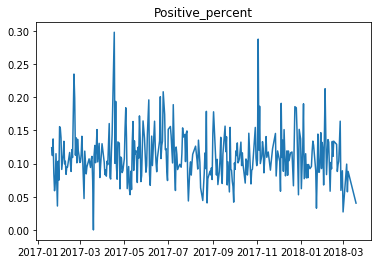

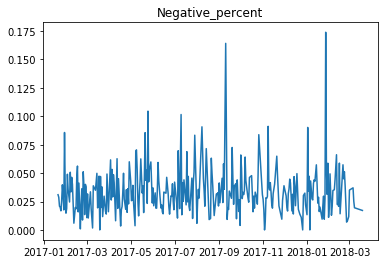

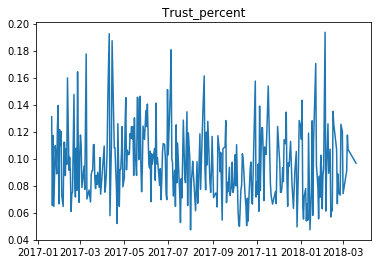

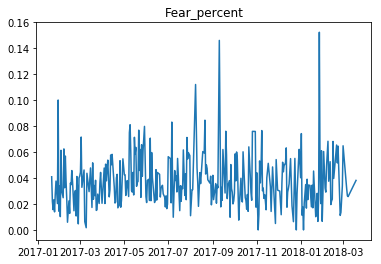

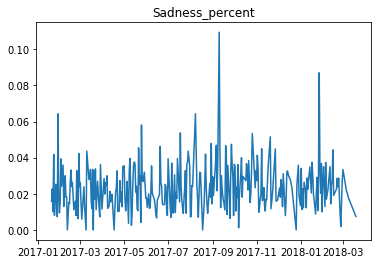

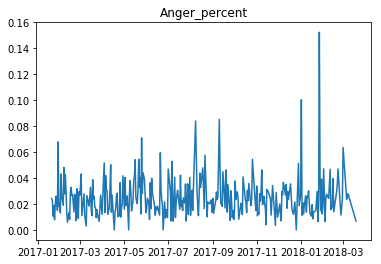

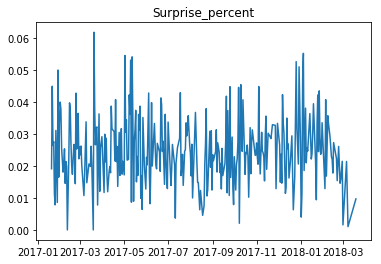

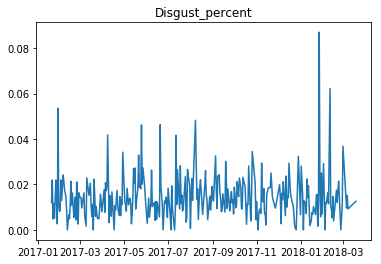

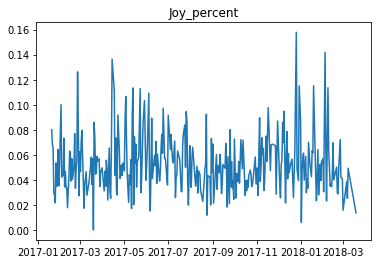

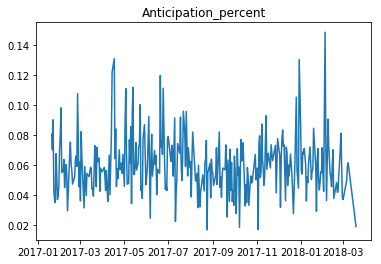

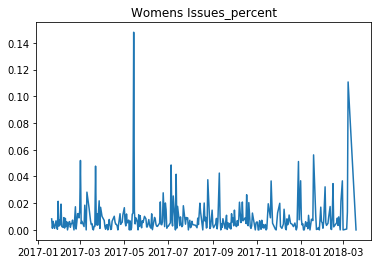

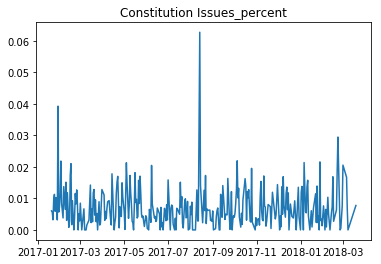

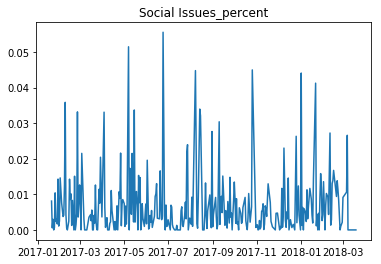

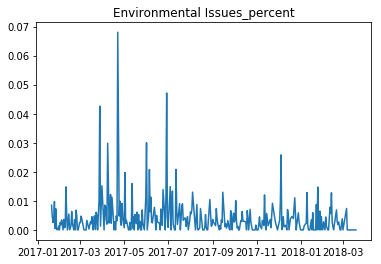

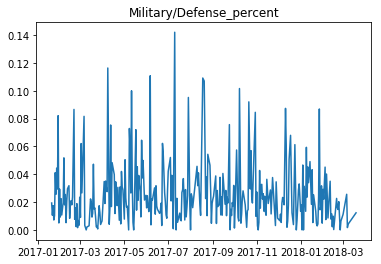

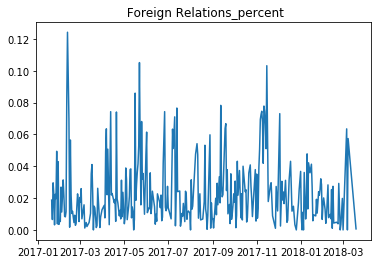

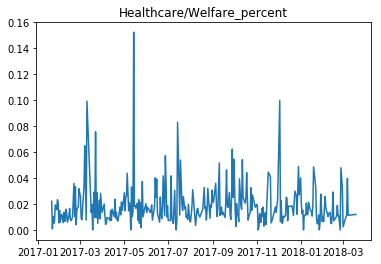

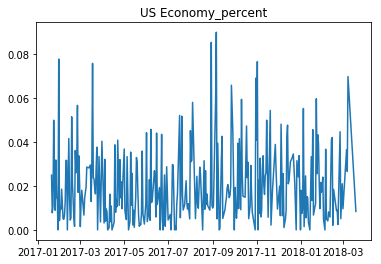

In [6]:
#examine trends in sentiment and policy word usage over time
for i in by_day.columns:
    plt.plot(by_day.index, by_day[i])
    plt.title(i)
    plt.show()


When we look at the Trump speeches grouped by individual days, we notice two particular patterns. First, we notice that each feature varies heavily around a particular proportion. Second, we notice occasional large spark spikes that indicate a particular day in which Trump used more words in that given feature. More in depth analysis should examine these spikes and understand these outliers and the context they exist in, but for this analysis we simply note that each feature experiences these spikes, some with more regularity. More importantly, the heavy variance between days may indicate too much noise in the data for any meaningful analysis, at least as speeches relate to approval ratings or changes in time.

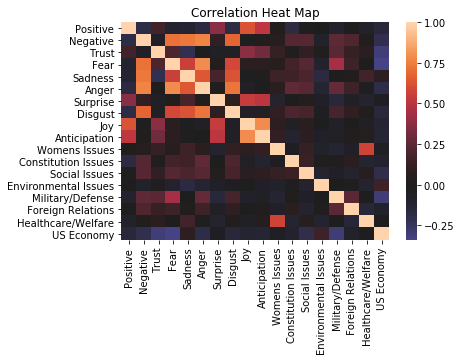

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent
Positive_percent,1.000000,-0.191853,0.177097,-0.108671,-0.120693,-0.168682,0.378429,-0.182680,0.627056,0.522166,0.031351,-0.174130,0.010786,0.001914,-0.093077,-0.004068,-0.089841,-0.152276
Negative_percent,-0.191853,1.000000,-0.073173,0.718527,0.736249,0.768967,0.109079,0.686245,-0.030872,0.036899,0.053655,0.234806,0.229921,-0.091621,0.253836,0.212096,0.029096,-0.202879
Trust_percent,0.177097,-0.073173,1.000000,0.206084,-0.212993,0.003067,-0.063509,-0.051345,0.378389,0.308517,0.125611,0.012050,0.111208,0.008868,0.245104,0.119033,0.071385,-0.307342
Fear_percent,-0.108671,0.718527,0.206084,1.000000,0.560072,0.793838,0.034298,0.591062,0.072886,0.075912,0.061062,0.169157,0.235429,-0.096030,0.446508,0.157217,-0.002648,-0.338294
Sadness_percent,-0.120693,0.736249,-0.212993,0.560072,1.000000,0.647396,0.189021,0.624991,-0.026851,0.009097,0.152452,0.160598,0.202627,-0.167978,0.004899,0.031902,0.167810,0.082545
Anger_percent,-0.168682,0.768967,0.003067,0.793838,0.647396,1.000000,0.022064,0.725479,-0.065780,-0.009003,0.077358,0.258671,0.237504,-0.117498,0.282645,0.157926,-0.030287,-0.190844
Surprise_percent,0.378429,0.109079,-0.063509,0.034298,0.189021,0.022064,1.000000,0.091352,0.544559,0.509808,-0.104249,-0.008134,0.038745,-0.072364,-0.152541,-0.051144,-0.099101,-0.037141
Disgust_percent,-0.182680,0.686245,-0.051345,0.591062,0.624991,0.725479,0.091352,1.000000,-0.066155,-0.056686,0.106017,0.208140,0.179724,-0.042063,0.182275,0.099351,0.036280,-0.150454
Joy_percent,0.627056,-0.030872,0.378389,0.072886,-0.026851,-0.065780,0.544559,-0.066155,1.000000,0.794886,0.086312,-0.059980,0.069164,0.003963,-0.080783,-0.003508,-0.051677,-0.118032
Anticipation_percent,0.522166,0.036899,0.308517,0.075912,0.009097,-0.009003,0.509808,-0.056686,0.794886,1.000000,0.104642,-0.109025,0.087716,-0.071482,-0.057308,0.022432,0.041911,-0.125096


In [190]:
#heatmap of the correlations
sns.heatmap(by_day.corr(), xticklabels=corpora, yticklabels=corpora, center= 0)
plt.title("Correlation Heat Map")
plt.savefig('Correlation Heat Map')
plt.show()

by_day.corr()


We can still examine patterns in Trumps speeches. We notice that particular sentiments covary together, forming two clusters of sentiments. The first is that of a positive sentiment containing positive, joy, surprise, and anticipation. These words tend to appear when Trump is talking about what he and his administration have accomplished or will accomplish.In the following example from when he had addressed Marines on November 26, 2017, we can see how Trump expresses this disbelief in his accomplishments:

*I have a __great__ marine who's the Chief of Staff—as you know, John Kelly—who's doing an __incredible__ job, just like any marine would. And, Major, to you and to all the marines doing this **great** work in delivering defeat after defeat to ISIS—what you're doing with ISIS is, again, being talked about. We're being talked about again as an Armed Forces. **We're really winning**. **We know how to win**, but we have to let you win. They weren't letting you win before; they were letting you play even. **We're letting you win**.*

When we examine the second sentiment cluster, we see negative, fear, anger, disgust, and sadness all heavily correlated with one another. This reflects the obstacles and opposition that he and his administration face, not only on policy but also on moral issues. When faced with these issues, Trump responds with what Jon Stewart referred to as 'gleeful cruelty'. The people and ideas he disagrees with are met with an added level of anger, disgust, and pity/ Let us take a look at another example from when Trump spoke at a Faith and Freedom Coalition conference on June 8th, 2017:

The **entrenched interests** and **failed, bitter** voices in Washington will do everything in their power to try and **stop us** from this righteous cause, to try to **stop all of you**. They will **lie**. They will **obstruct**. They will spread their **hatred** and their **prejudice**. But we will not back down from doing what is right. 

The remaining sentiment of trust does not fall into either of these clusters, even though it is heavily correlated with joy. Rather, trust seems to broker these two clusters, on what he will overcome and accomplish. The message being that Americans should place their faith in Trump to protect rom their issues because he will accomplish. The following example, taken from a Celebrate Freedom rally on July 1, 2017, highlights the way in which Trump utilizes this trust sentiment:

Their agenda is not your agenda. You've been saying it. **I will never stop fighting for you**. **I am delivering** on trade, on the economy, on the Supreme Court, on the Second Amendment, on our military, for our veterans, and on our borders, where we are doing record, record stoppage. Thank you. And we are supporting our incredible police and law enforcement. We **will save** American lives, **protect** American sovereignty, and we will **ensure** the forgotten men and women of our country are never forgotten again.


Between topics, we do see that woman’s issues and healthcare issues tend to appear strongly correlated, seeing as some women’s issues deal with access to reproductive care. We see that environmental issues are not strongly correlated with any other topic, which might in part due to the corpus of environmental words containing predominantly scientific options. There exist this negative relationship between the U.S. economy and military and defense, as if Trump avoids talking about the two It may be that defense and the protection of the American people should not be placed into fiscal constrictions. We also see a loose correlation between military/defense issues and foreign relation issues. This may be due to the fact that Trump refers to protecting America’s values and interests. Predominantly, he has focus on how America is being taken advantage of in the international sphere, and he has promised to fix it, such as in this example from a rally in Harrisburg, Pennsylvania on April 29, 2017:

But they're all part of a broken system that has profited from this **global theft and plunder of American wealth** at the expense of the American worker. We are not going to let other countries take advantage of us anymore. Because, from now on, it's going to be **America first**.

When we examine the relationship between policy and sentiment, we have to realize that the corpus of words used for policy are significantly smaller than those of sentiment, leading to smaller proportions. We had to create our own corpora for each policy issues that had less than 100 words, compared to the thousands when examining sentiment. In addition, we had to use words that were specific to a particular issue, meaning that we wanted to limit overlap in words between policy issues and limit words that could be used in other contexts. The same cannot be said for the sentiment corpora, in which words commonly share differing sentiments as emotions tend to blend together. With this smaller proportion in topics, the signal noise ratio in sentiments may be drastically different to the signal noise ratio in topics. This discrepancy may distort the correlation by pulling it closer to 0 since the covariance between the two may be drowned out by the noise in the sentiment. With that being said, we see that when it comes to social policy (such as issues of race or inequality), constitutional issues, or military and defense issues, Trump’s rhetoric revolves around the negative sentiment cluster, negativity, fear, anger, sadness, and disgust. The biggest difference is that in military and defense issues, Trump also has a rhetoric of trust. Trust that he will get rid of the enemy and protect America. 

Finally, Trump’s rhetoric towards the U.S. economy seems to indicate a strange relationship between trust and fear sentiment. Based on these correlations, it would indicate that Trump tends to talk about the economy as if there is nothing to fear but there is much to be distrusted. It could be that when he talks about American jobs, he talks about how these horrible things have occurred to blue collar jobs and the promises that have been made to the American people have not been fulfilled; an interesting take on the American cynicism. I also believe that this is the best representation of Trump’s rhetoric. We have seen based on the examples, that he talks from this point of view of “us against them”. Depending upon who he is talking to, the “them” can easily shift. The underlying message and rhetoric is that “they” have deceived you, but as long as we fight, there should be nothing to fear, as “we” will prevail. Obviously, this is a naïve interpretation, but based on the examples and statistics, it would seem that we have evidence to support this interpretation Trump’s message.




#### By Week

We have taken a look at what Trump's overall message seems to be; now, let us see if we can examine how this message may change over time by trying to smooth out the data a bit. We now look at changes in sentiment and policy over weeks, a opposed to days. The overall method of computing proportions remains the same, but rather we compute proportions for weeks as opposed to days. First, let us examine how the smoothing has changed approval ratings.

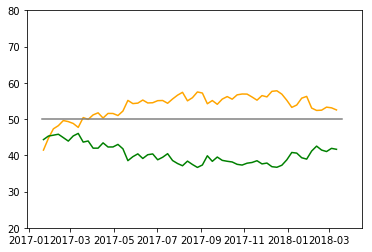

approval gain (by week) in 2018: 2.8690419065656627
disapproval gain (by week) in 2018: -1.6547094494949306


In [8]:
#examine the weekly trends in approval ratings
week_dis = df['adjusted_disapprove'].resample('w').mean()
week_app = df['adjusted_approve'].resample('w').mean()

plt.plot(week_dis, c='orange')
plt.plot(week_app, c = 'green')
plt.plot((df.index[0], df.index[-1]), (50, 50),  c ='gray')
plt.ylim(20, 80)
plt.show()

dis17 = week_dis.loc['2017-12-31']
app17 = week_app.loc['2017-12-31']
disq1 = np.max(df.iloc[-1, -1])
appq1 = np.max(df.iloc[-1, -2])
print("approval gain (by week) in 2018: " + str(appq1 - app17))
print("disapproval gain (by week) in 2018: " + str(disq1 - dis17))

We see a more smoothed version of the approval ratings graph. It still follows the same shape and same trends. However, the differences between the end of 2017 through the end of the first quarter of 2018 are more exaggerated. So, we sacrifice this exactness since the change we wish to observe is that closer to 2, but since it is not overtly exaggerated, we can make the argument that this is a decent balance.  Previously, with daily changes, we lack the interpretability that an observed change is due to something that happened earlier in the week or the day prior. We now have a little bit more flexibility in this window, and it seems that we can now use the previous weeks' events to explain the the current week's change in approval rating. The noise in the daily ratings are absorbed into the week estimation. We could now further investigate the shifts that occur between weeks and attempt to explain them using Trump's actions and events from the previous weeks as being responsible for the observed change. 

In [9]:
#modify our predictor variables to represent weekly proportions
by_week = pd.DataFrame()
grouped = df.resample('w').sum()
for i in corpora:
    by_week[i+'_percent'] = grouped[i]/grouped['Speech Length']
by_week = by_week.dropna()
by_week.head()

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent
Date,,,,,,,,,,,,,,,,,,
2017-01-22,0.119020,0.028603,0.093514,0.027666,0.018895,0.021654,0.034043,0.016631,0.072016,0.076024,0.004216,0.005518,0.003410,0.005778,0.014315,0.013300,0.009187,0.013950
2017-01-29,0.067789,0.025442,0.102032,0.025926,0.016902,0.019332,0.015149,0.010856,0.033244,0.044851,0.002802,0.006886,0.003960,0.002067,0.032643,0.022837,0.017261,0.018139
2017-02-05,0.123868,0.027243,0.091792,0.023607,0.022542,0.020503,0.029985,0.013413,0.058962,0.067840,0.004765,0.009355,0.008465,0.001903,0.013639,0.012297,0.008308,0.018629
2017-02-12,0.095249,0.035359,0.106954,0.035185,0.022473,0.028046,0.022690,0.015666,0.035615,0.051410,0.002923,0.010471,0.010545,0.005432,0.015678,0.017858,0.010066,0.017059
2017-02-19,0.093240,0.050334,0.067058,0.033898,0.030375,0.030115,0.026526,0.018763,0.041300,0.059817,0.004708,0.017690,0.009216,0.001819,0.021673,0.026605,0.007972,0.010371


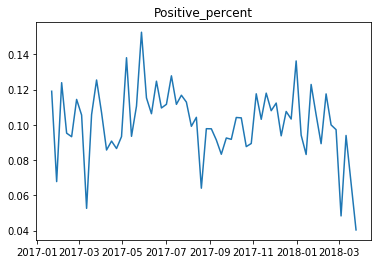

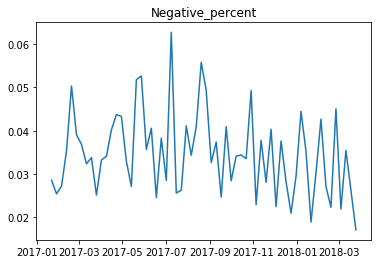

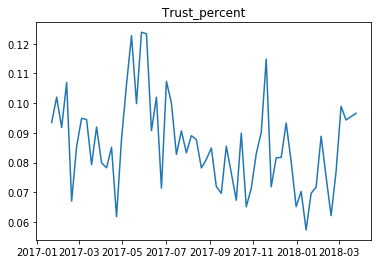

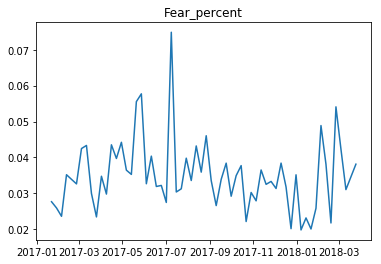

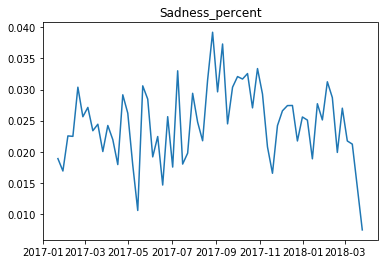

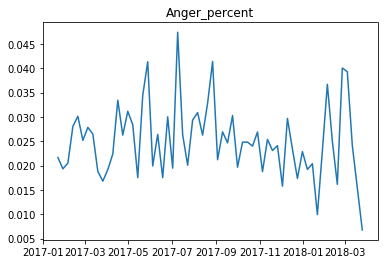

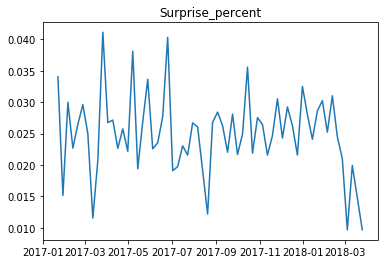

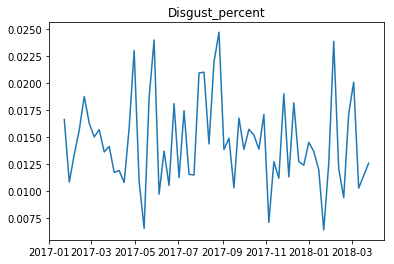

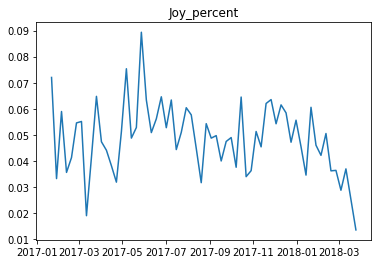

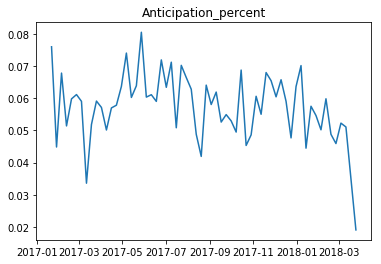

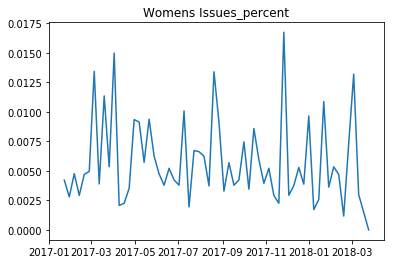

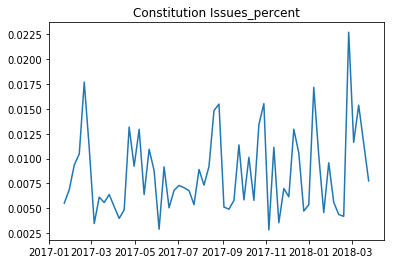

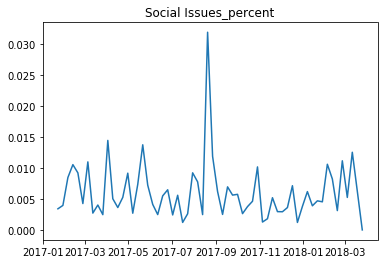

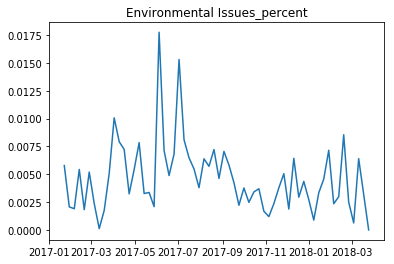

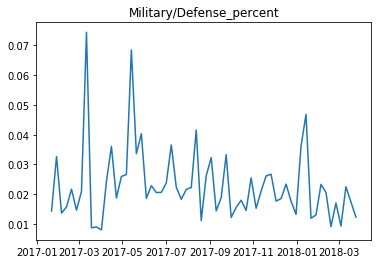

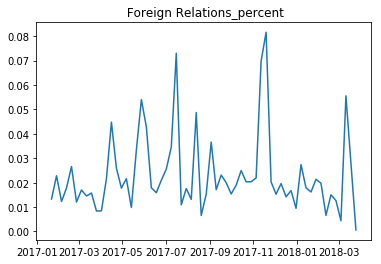

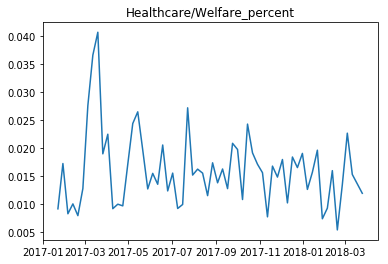

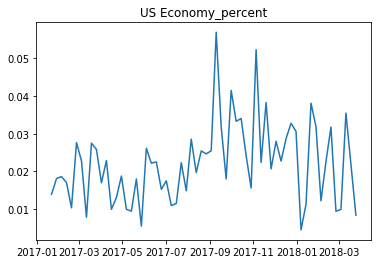

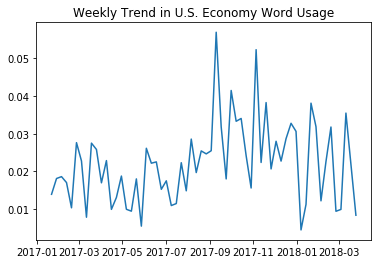

In [180]:
#examine trends in sentiment and policy word usage over a given week
for i in by_week.columns:
    plt.plot(by_week.index, by_week[i])
    plt.title(i)
    plt.show()


We now want to smoooth out the proportion of words in speeches. We now see easily more interpretable trends, and we could relate these trends to changes in policy, message, or rhetoric. The biggest change that occurs when we shift the temporal scope from day to week is that we are shifting each feature closer to 0 since we recalculate the proportions for each feature. This sacrifice of the exactness, we want to be careful in correlating our features since we are interfering with the relationship between them by shifting the values down. However, we can view the scatter plots with the approval and disapproval ratings to examine the relationship rhetoric and public opinion.

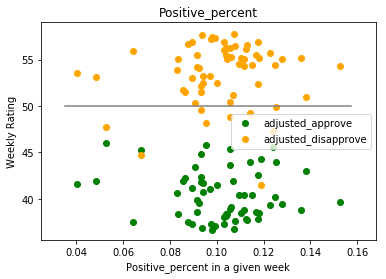

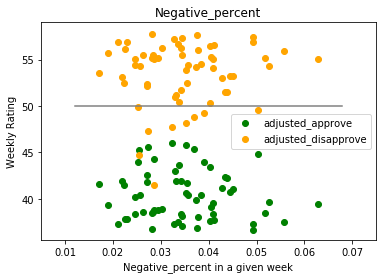

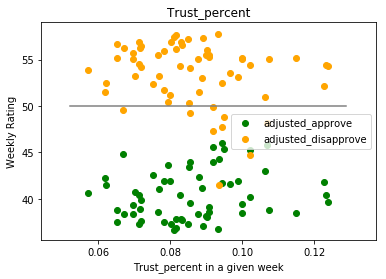

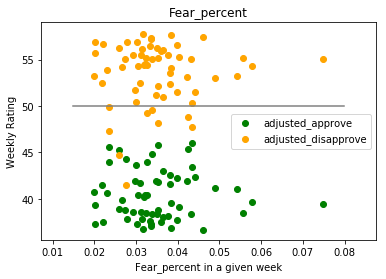

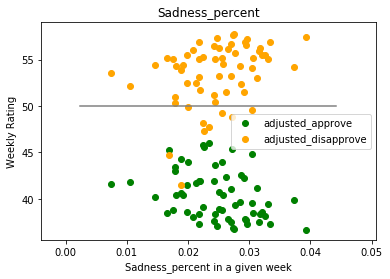

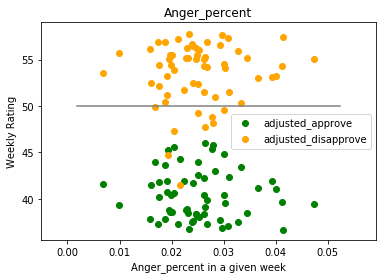

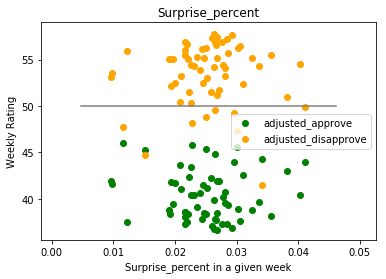

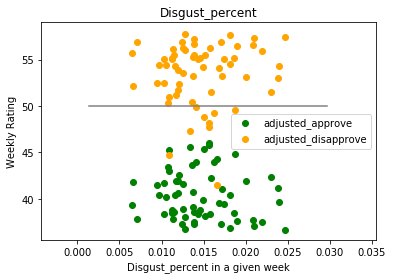

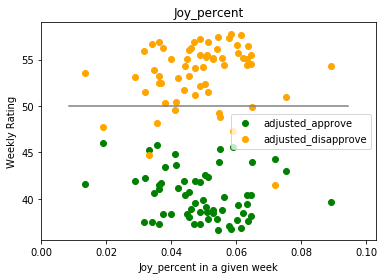

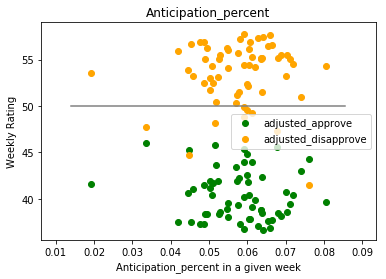

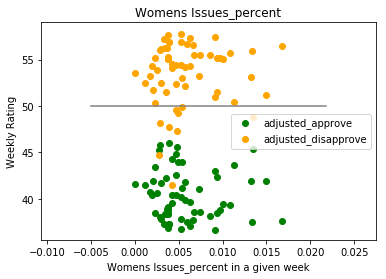

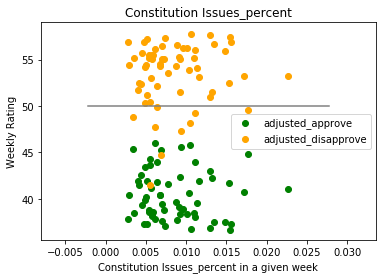

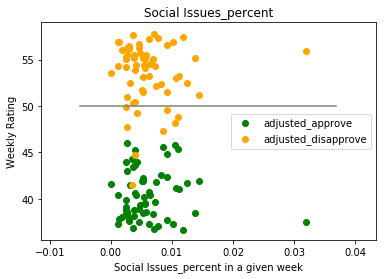

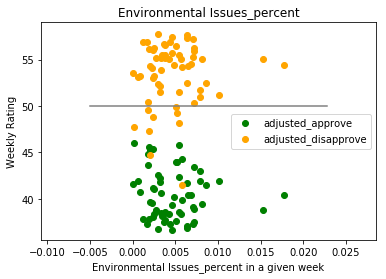

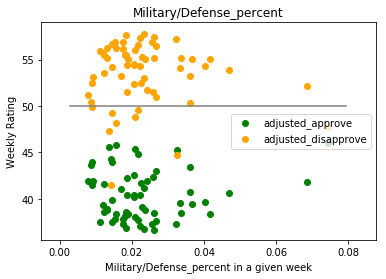

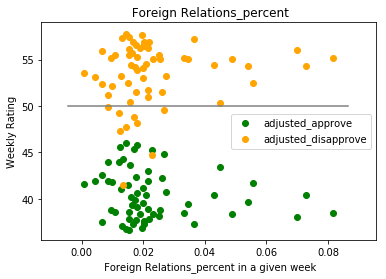

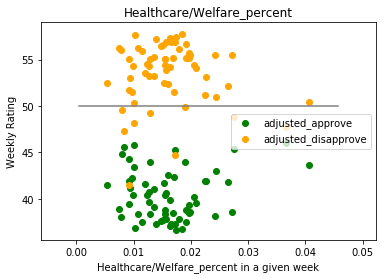

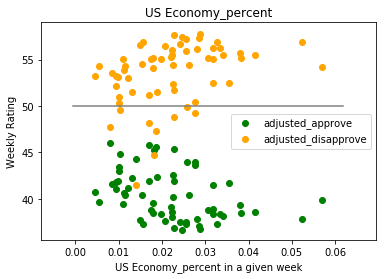

In [11]:
#explore the relationships between our predictors and the approval ratings
for i in by_week.columns:
    plt.scatter(by_week[i], app_week, c = 'green')
    plt.scatter(by_week[i], dis_week, c = 'orange')
    plt.plot((np.min(by_week[i]) - 0.005, np.max(by_week[i]) + 0.005), (50, 50), c = 'gray')
    plt.ylabel('Weekly Rating')
    plt.xlabel(str(i) + ' in a given week')
    plt.title(i)
    plt.legend(loc = 5)
    plt.show()
    

In [12]:
#can explore the strength of this relataionship
week = by_week.join([app_week, dis_week])
week_cor = week.corr().iloc[:-2, -2:]
print(week_cor)

                              adjusted_approve  adjusted_disapprove
Positive_percent                     -0.132973             0.095194
Negative_percent                     -0.095028             0.090485
Trust_percent                         0.186940            -0.202353
Fear_percent                         -0.018217             0.060110
Sadness_percent                      -0.341824             0.333670
Anger_percent                        -0.064967             0.080004
Surprise_percent                     -0.043883             0.001800
Disgust_percent                      -0.102201             0.067521
Joy_percent                          -0.194779             0.100089
Anticipation_percent                 -0.117646             0.026590
Womens Issues_percent                -0.059991             0.067188
Constitution Issues_percent          -0.049028             0.071684
Social Issues_percent                -0.015590             0.003990
Environmental Issues_percent         -0.111447  

Based on our observation, we see that there are only two features that have a relationship with the approval ratings: sadness and U.S. economy. Both of which have a negative relationship with approval rating and positive relationship with the disapproval rating. We cannot infer causal direction, which seems crucial in this explanation. This relationship could be Trump, responding to a lower approval rating, attempts to focus on the U.S. economy and uses more words with a sad sentiment. The opposite could also be true that, ironically, as Trump speaks on the U.S. economy or expresses this sadness, the more disliked he becomes. 

As we have outlined how we think this U.S. economy feature captures the Trump rhetoric, the causal direction matters; does he rely on it when public opinion is not in his favor or is that what causes poor public opinion? 

We can take this a step further and examine the relationship between the features and changes in approval ratings (e.g. from the previous week to this week, Trump's approval rating dropped by 0.2 points). 

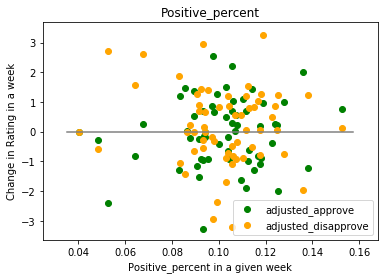

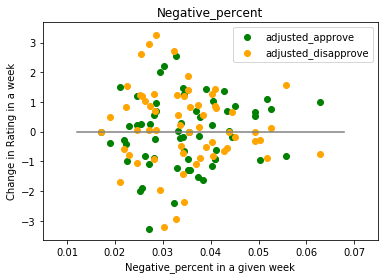

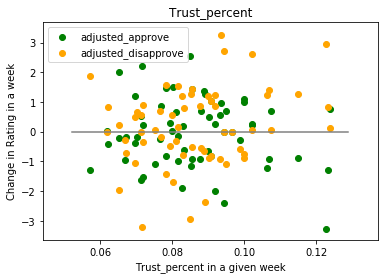

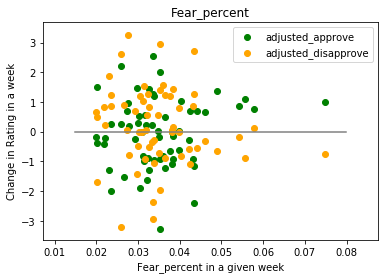

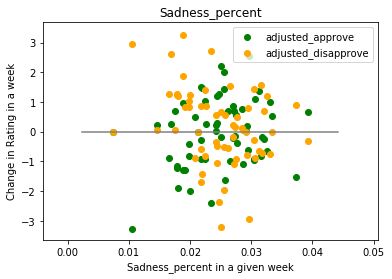

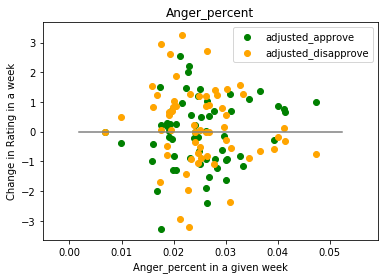

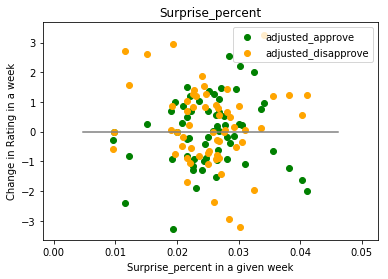

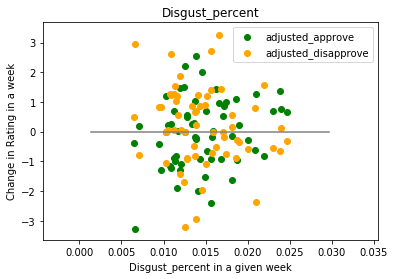

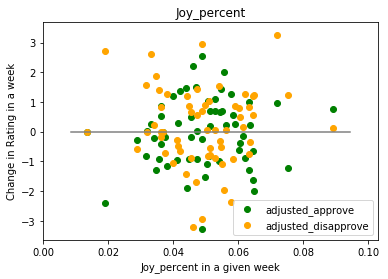

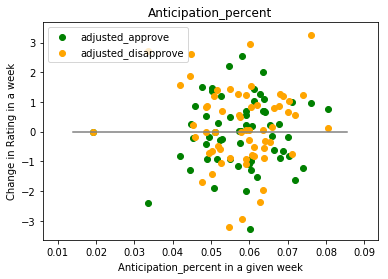

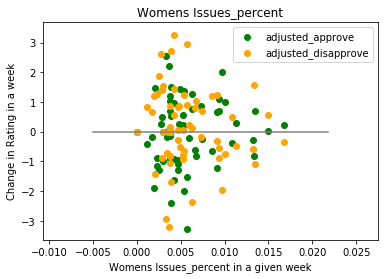

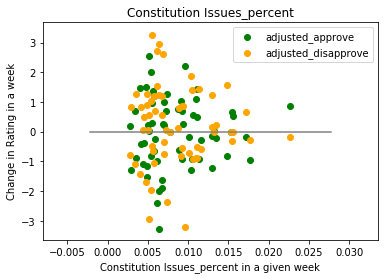

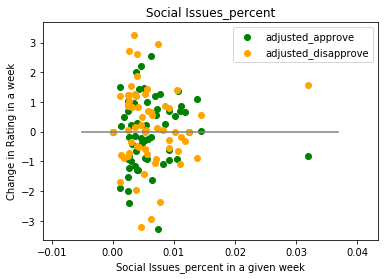

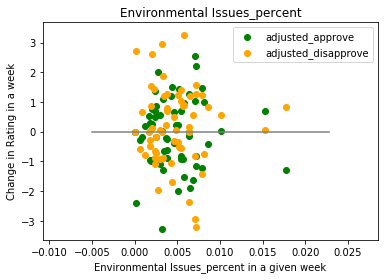

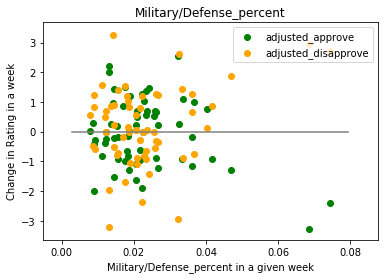

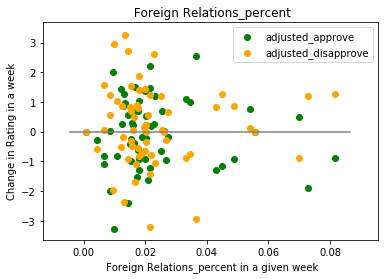

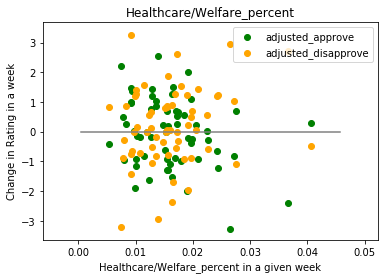

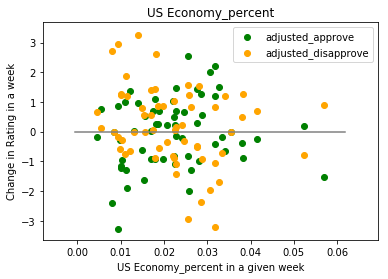

In [113]:
#want to explore the relationship between our features and the changes that occur
for i in by_week.columns:
    plt.scatter(by_week[i], dif_app_week, c = 'green')
    plt.scatter(by_week[i], dif_dis_week, c = 'orange')
    plt.plot((np.min(by_week[i]) - 0.005, np.max(by_week[i]) + 0.005), (0, 0), c = 'gray')
    plt.ylabel('Change in Rating in a week')
    plt.xlabel(str(i) + ' in a given week')
    plt.title(i)
    plt.legend()
    plt.show()

In [115]:
difweek = by_week.join([dif_app_week, dif_dis_week])
difweek_cor = difweek.corr().iloc[:-2, -2:]
print(difweek_cor)

                              adjusted_approve  adjusted_disapprove
Positive_percent                      0.020105            -0.070895
Negative_percent                     -0.029662            -0.012353
Trust_percent                         0.128679            -0.051805
Fear_percent                          0.053322            -0.096475
Sadness_percent                      -0.005911            -0.006575
Anger_percent                         0.141629            -0.112652
Surprise_percent                      0.079689            -0.107505
Disgust_percent                       0.031637            -0.035803
Joy_percent                           0.054830            -0.055976
Anticipation_percent                  0.008055            -0.019978
Womens Issues_percent                -0.240987             0.232944
Constitution Issues_percent          -0.161424             0.168582
Social Issues_percent                -0.205281             0.207373
Environmental Issues_percent         -0.156299  

When we examine this relationship, we don't see any feature with a substantial relationship to the changes in ratings. The largest relationship we do see is that between change in ratings and women's issues. This relationship, once again, is negative in regards to changes in approval rating and positive for changes in his disapproval rating. Once more, we cannot infer causal relationship, however, based upon Trump's track record in this regard, we are more inclined to think that the more Trump discusses women's issues, the worse public opinion responds. Although, it is still possible that the alternate might be true.

However, this may not fully capture the picture. For this, we are assuming that the changes occuring in that week are related to the words he has given that week. We might want to know the relationship between word usage in week 1 and the change in approval rating for the following week. This entails slight modification to our data frame. We have crop our data frame so that the predicted value is the change for next week. 

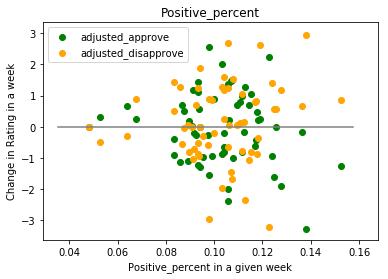

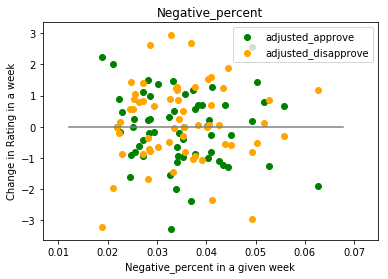

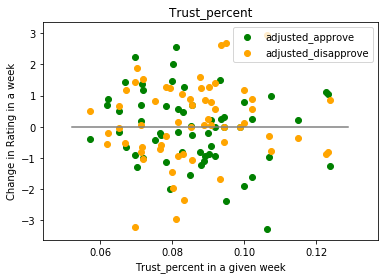

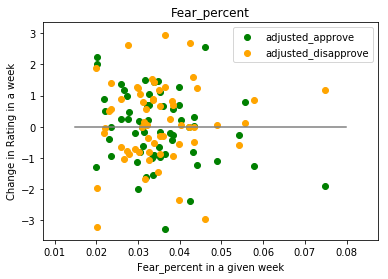

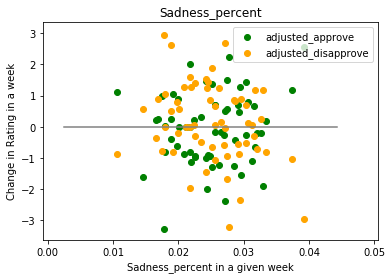

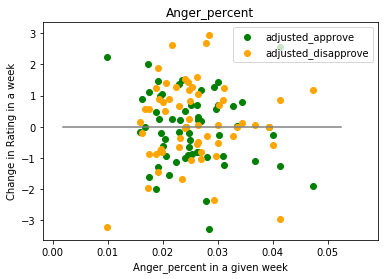

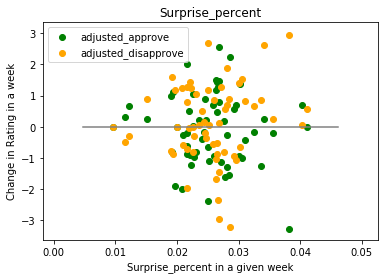

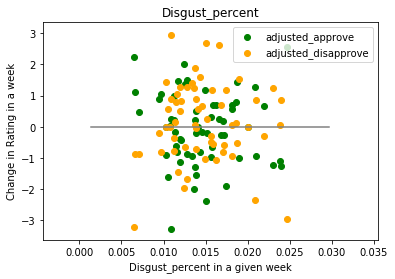

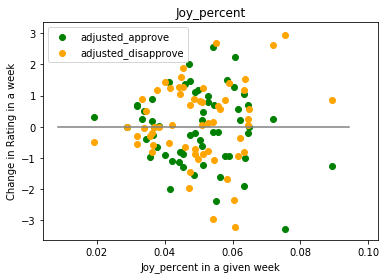

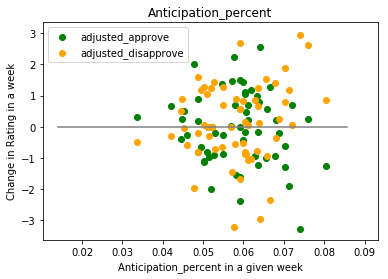

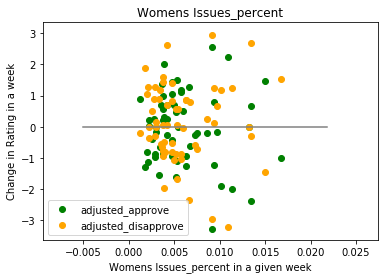

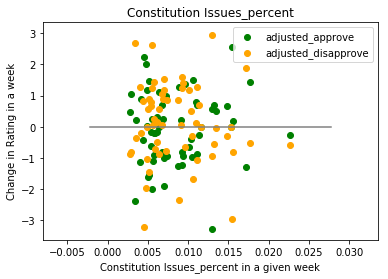

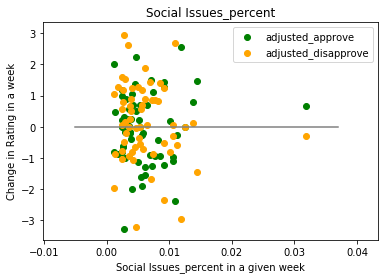

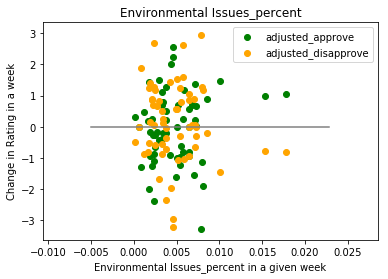

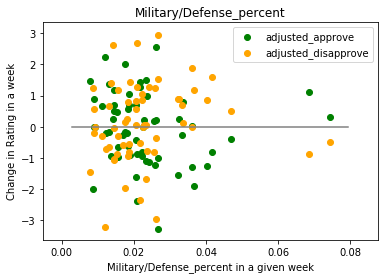

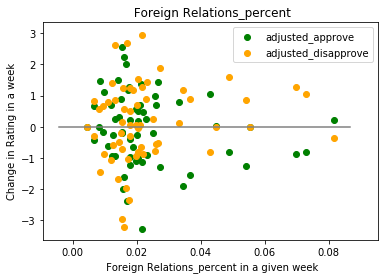

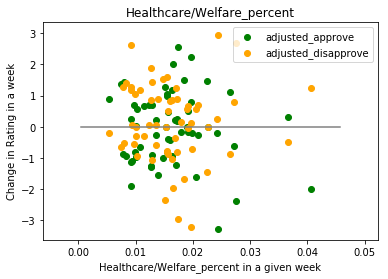

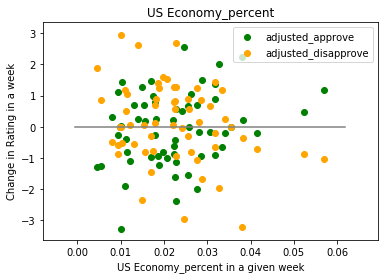

In [114]:
#explore the relationship between our predictors and the changes in ratings
#that happen following a the given word usage
for i in by_week.columns:
    plt.scatter(by_week[i][:-1], dif_app_week[1:], c = 'green')
    plt.scatter(by_week[i][:-1], dif_dis_week[1:], c = 'orange')
    plt.plot((np.min(by_week[i]) - 0.005, np.max(by_week[i]) + 0.005), (0, 0), c = 'gray')
    plt.ylabel('Change in Rating in a week')
    plt.xlabel(str(i) + ' in a given week')
    plt.title(i)
    plt.legend()
    plt.show()

In [162]:
app_changes = pd.DataFrame(dif_app_week.values[:-1]).T
dis_changes = pd.DataFrame(dif_dis_week.values[:-1]).T
weeks = pd.DataFrame(by_week.values[1:]).T
new_df = pd.concat([weeks,app_changes, dis_changes]).T
cols = []
for i in by_week.columns:
    cols.append(i)
cols.append('app_changes')
cols.append('dis_changes')
new_df.columns = cols
new_df.index = by_week.index[1:]
print(new_df.corr().iloc[:-2, -2:])

                              app_changes  dis_changes
Positive_percent                 0.020105    -0.070895
Negative_percent                -0.029662    -0.012353
Trust_percent                    0.128679    -0.051805
Fear_percent                     0.053322    -0.096475
Sadness_percent                 -0.005911    -0.006575
Anger_percent                    0.141629    -0.112652
Surprise_percent                 0.079689    -0.107505
Disgust_percent                  0.031637    -0.035803
Joy_percent                      0.054830    -0.055976
Anticipation_percent             0.008055    -0.019978
Womens Issues_percent           -0.240987     0.232944
Constitution Issues_percent     -0.161424     0.168582
Social Issues_percent           -0.205281     0.207373
Environmental Issues_percent    -0.156299     0.021039
Military/Defense_percent         0.174677    -0.151565
 Foreign Relations_percent       0.202144    -0.260566
Healthcare/Welfare_percent      -0.148018     0.093212
US Economy

#### Modeling

We first are going to look at being able to predict daily approval ratings and rating changes using a simple linear model. 

In [38]:
#attempt a simple linear model on daily ratings
reg.fit(by_day, app_day)
print('variance in daily approval ratings explained by sentiment and topics: ' + str(reg.score(by_day, app_day)))
reg.fit(by_day, dis_day)
print('variance in daily disapproval ratings explained by sentiment and topics: ' + str(reg.score(by_day, dis_day)))
reg.fit(by_day, dif_app_day)
print('variance in daily change in approval ratings explained by sentiment and topics: ' + str(reg.score(by_day, dif_app_day)))
reg.fit(by_day, dif_dis_day)
print('variance in daily approval rating explained by sentiment and topics: ' + str(reg.score(by_day, dif_dis_day)))

variance in daily approval ratings explained by sentiment and topics: 0.09042618373273648
variance in daily disapproval ratings explained by sentiment and topics: 0.08282620863468505
variance in daily change in approval ratings explained by sentiment and topics: 0.07750449604170473
variance in daily approval rating explained by sentiment and topics: 0.07194330195393628


We instantly see from the R squared that these are not good models. There is simply too much noise to be able to detect, let alone predict a signal. This is simply because flucuations between days is too great, causing too much variation. We can try a more complex model such as Random Forrest Regressors.

In [41]:
#explore more complex forest regression on the daily ratings
#and how much variance they account for
forrest.fit(by_day, app_day)
print('variance in daily approval ratings explained by sentiment and topics: ' + str(forrest.score(by_day, app_day)))
forrest.fit(by_day, dis_day)
print('variance in daily disapproval ratings explained by sentiment and topics: ' + str(forrest.score(by_day, dis_day)))
forrest.fit(by_day, dif_app_day)
print('variance in daily change in approval ratings explained by sentiment and topics: ' + str(forrest.score(by_day, dif_app_day)))
forrest.fit(by_day, dif_dis_day)
print('variance in daily approval rating explained by sentiment and topics: ' + str(forrest.score(by_day, dif_dis_day)))

variance in daily approval ratings explained by sentiment and topics: 0.7856240274235111
variance in daily disapproval ratings explained by sentiment and topics: 0.7746917374109632
variance in daily change in approval ratings explained by sentiment and topics: 0.7892768454598666
variance in daily approval rating explained by sentiment and topics: 0.7760924015658206


We can instantly see vast improvements when using the Random Forrest Regressors since the model is able to explain more variance. The major difference is that the random forrest does not rely on linear assumptions which seems important since our data does not look as linear as we would like. However, we do not know whether or not, we still have not answered the question about predicting Trump's approval rating from the changes in Trump's speeches.

In [167]:
#speeches and ratings for same days
for i in rating_day:
    X_train, X_test, y_train, y_test = train_test_split(by_day, i, test_size = 0.25, random_state = 11)
    forrest.fit(X_train, y_train)
    y_pred = forrest.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(i.name + ' rmse: ' + str(np.sqrt(score)))
    for feat, name in sorted(zip(forrest.feature_importances_, by_day.columns), reverse=True)[:3]:
        print(feat, name)
    print("-----------------------------------------------")

adjusted_approve rmse: 3.0514611337869657
0.11060890697992587 Sadness_percent
0.0850610273092048  Foreign Relations_percent
0.0849710728409396 Trust_percent
-----------------------------------------------
adjusted_disapprove rmse: 3.520576059801124
0.10191819430392098 Surprise_percent
0.07830571282640601 Anticipation_percent
0.07317240276390566  Foreign Relations_percent
-----------------------------------------------
App rating change rmse: 1.2775829480113723
0.14604258067327697 Trust_percent
0.08847580855066042 Military/Defense_percent
0.0816006506578771 Healthcare/Welfare_percent
-----------------------------------------------
Dis rating change rmse: 1.4547622192175267
0.11946697406999221 Healthcare/Welfare_percent
0.08342989114104263 Trust_percent
0.07451396820756741 US Economy_percent
-----------------------------------------------


We come to find that our model is not a terrible predictor, but it is not as good as we had hoped. Above are the root mean square errors for each regression as it predicts approval and disapproval rating, as well as changes in approval and disapproval ratings. We see that on average our model is 3 to 3.5 points off. If we consider the approval and disapproval ratings momentarily, we notice that the range is about 10 and 16 points respectively. Our outcome variable makes small changes as opposed to our predictor variables. So, this means that the average error for our model can be include anywhere from 1/3 of the range to about 1/5 off the range. For our changes in approval ratings, the our observed values are between six points of each other. With a RSME of about 1.5, we are seeing that the average error for our model can include 1/4 of the range.

We now want to try predicting the following day's ratings from the previous days.

In [170]:
#ratings for day after speeches
for i in rating_day:
    X_train, X_test, y_train, y_test = train_test_split(by_day[:-1], i[1:],test_size = 0.25, random_state = 11)
    forrest.fit(X_train, y_train)
    y_pred = forrest.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(i.name + ' rmse: ' + str(np.sqrt(score)))
    for feat, name in sorted(zip(forrest.feature_importances_, by_day.columns), reverse=True)[:3]:
        print(feat, name)
    print("-----------------------------------------------")

adjusted_approve rmse: 2.9973298786983897
0.07788437231508645  Foreign Relations_percent
0.07636067595434745 Constitution Issues_percent
0.07481123721943907 Surprise_percent
-----------------------------------------------
adjusted_disapprove rmse: 3.435116130255586
0.12083002424423875 Trust_percent
0.09916513726253592 Healthcare/Welfare_percent
0.08580493882390326 Joy_percent
-----------------------------------------------
App rating change rmse: 1.280790988969921
0.09308182594847787 Military/Defense_percent
0.07417915200919542 Surprise_percent
0.06838631152075528 Constitution Issues_percent
-----------------------------------------------
Dis rating change rmse: 1.3496207912587532
0.09505882867264542 Anticipation_percent
0.08985527819114957 Military/Defense_percent
0.06953586724947104 US Economy_percent
-----------------------------------------------


We get nearly similiar results to when predicting on the same day. Not any changes that are substantial in regards to the accuracy of the model. We do see some changes in the important features. But, we aren't going to put too much weight on this model since we believe we can do better. We want to try and reduce the bias that occurs with the narrow time window. We believe that the week time window would balance out the variance-bias tradeoff.

In [171]:
#speeches and ratings for same week
for i in rating_week:
    X_train, X_test, y_train, y_test = train_test_split(by_week, i, test_size = 0.25, random_state = 11)
    forrest.fit(X_train, y_train)
    y_pred = forrest.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(i.name + ' rmse: ' + str(np.sqrt(score)))
    for feat, name in sorted(zip(forrest.feature_importances_, by_week.columns), reverse=True)[:3]:
        print(feat, name)
    print("-----------------------------------------------")

adjusted_approve rmse: 2.7321655213836706
0.26645079653227366 US Economy_percent
0.12909479516680797 Trust_percent
0.12611383688463348 Constitution Issues_percent
-----------------------------------------------
adjusted_disapprove rmse: 3.5523246626847773
0.20028128849222998 US Economy_percent
0.1288920557864812 Healthcare/Welfare_percent
0.11362231231915539 Trust_percent
-----------------------------------------------
adjusted_approve rmse: 1.257546791493278
0.20195025071534145 Military/Defense_percent
0.12099326019279293 US Economy_percent
0.09257299276594134 Sadness_percent
-----------------------------------------------
adjusted_disapprove rmse: 1.2530269037149084
0.3003834995202132 Sadness_percent
0.0852999797392016 Military/Defense_percent
0.08392758912824118 Trust_percent
-----------------------------------------------


In [172]:
#ratings for week after speeches
for i in rating_week:
    X_train, X_test, y_train, y_test = train_test_split(by_week[:-1], i[1:], test_size = 0.25, random_state = 11)
    forrest.fit(X_train, y_train)
    y_pred = forrest.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(i.name + ' rmse: ' + str(np.sqrt(score)))
    for feat, name in sorted(zip(forrest.feature_importances_, by_week.columns), reverse=True)[:3]:
        print(feat, name)
    print("-----------------------------------------------")

adjusted_approve rmse: 2.7680875989488554
0.32803749010866057 Healthcare/Welfare_percent
0.16990674716798917 US Economy_percent
0.07563563798752021 Joy_percent
-----------------------------------------------
adjusted_disapprove rmse: 3.3471078122006097
0.14306179746744904 Surprise_percent
0.13758078477319285 Trust_percent
0.11587164543204638 Sadness_percent
-----------------------------------------------
adjusted_approve rmse: 1.1451002283544298
0.11038785339449837 Fear_percent
0.1043149681634113 Surprise_percent
0.09158638331807409 Social Issues_percent
-----------------------------------------------
adjusted_disapprove rmse: 1.4375248243740477
0.1766744572594337 Anticipation_percent
0.11592352731585527 Joy_percent
0.10391060258317282 Social Issues_percent
-----------------------------------------------


#### Results and Conclusions

However, changing the time window does not prove to be a better model than the day window. The root-mean-squared-error is showing us that we are underfitting our model, that with our current features, we cannot predict the approval rating as precisely as we would like. By examining Trump's use of language and the resulting effect on public opinion, we seem to be left in this gray area. 

We were able to explore the relationships between speech topics and sentiments yet, the relationship between his speeches and public opinion is not as visible as we might have hoped. Obviously, further analysis and more robust language processing techniques could be developed and administered to pinpoint crucial themes or utilize larger proportions of the speeches themselves. 

We could look to further develop our features as is. This might look like developing more comprehensive corpora of words, examining n-grams rather than single words, and pulling out speeches that are more representative of Trump's public opinion. The other possibility is trying to reduce noise in our data set. The speeches that we pulled included comments and questions from reporters or other diplomats that dilute Trump's rhetoric. Trump is still the dominant proponent of the words used, but we still do have this noise that we could clean up. Furthermore, part of the data set includes the executive orders read and signed by Trump which include more diplomatic, legal language as compared to what Trump would share when speaking to the public. 

We could include these, but I would recommend the addition of using Trump's tweets for a more robust examination of sentiment and policy word usage. I believe Trump’s tweets reflect a better image of the sentiment and public opinion without dealing with the same level of noise his speeches encounter. We approached the project with the belief that his speeches reflected a healthy balance of sentiment and policy, but they seem to lack that relationship to the approval ratings. In addition, only particular selection of Trump’s speeches are broadcasted to the American public. Whereas, Trumps tweets get covered by the media and digested by a large twitter following. In other words, it would seem that his tweets reach a larger audience than do his speeches.

We can attempt to explain why we cannot predict Trump's approval rating from his speeches. That is because Trump's image, being repeated on every major media outlet, has already been solidified by most Americans. Rather, it won't simply be one speech or tweet that drastically changes the entrenched opinions. For Trump to gain substantial approval ratings, to be considered a great leader, he needs to demonstrate himself as a competent diplomat and a just and fair representative of the people rather than telling people what is or is not great. Even then, if changes were taken in behavior and attitude, who is to say the public could characterize him any differently. Who is to say he wouldn't lose his base support who have come to adore him as an "honest" man accomplishing "God's work". We were able to better understand the man's rhetoric and message, but as it relates to his approval rating, the answer is not necessarily that black and white.


